# Carbon Dioxide Emissions

This notebook provides the codes that generate the plots in my slides.



In [9]:
# import all the packages needed
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
co2_data = pd.read_csv("/content/drive/My Drive/historical_emissions.csv")
co2_data.sample(5)

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
190,Nauru,CAIT,Total including LUCF,CO2,MtCO₂e,0.07,0.07,0.06,0.05,0.05,...,0.09,0.10,0.10,0.10,0.11,0.11,0.11,0.12,0.13,0.13
133,El Salvador,CAIT,Total including LUCF,CO2,MtCO₂e,7.89,7.46,8.25,8.08,7.67,...,6.69,6.75,6.40,5.47,6.04,5.54,5.00,4.44,4.15,3.46
96,Uganda,CAIT,Total including LUCF,CO2,MtCO₂e,21.95,21.66,21.50,20.69,20.57,...,17.19,17.16,17.00,16.94,16.83,16.56,16.65,16.65,16.64,16.62
157,Bahamas,CAIT,Total including LUCF,CO2,MtCO₂e,2.26,2.15,2.19,2.37,2.62,...,2.23,2.27,1.77,1.97,2.08,2.04,2.10,2.53,1.88,1.78
80,Denmark,CAIT,Total including LUCF,CO2,MtCO₂e,34.23,34.19,36.23,31.65,33.81,...,57.29,60.08,64.06,73.65,60.26,63.53,59.63,57.35,63.07,52.43


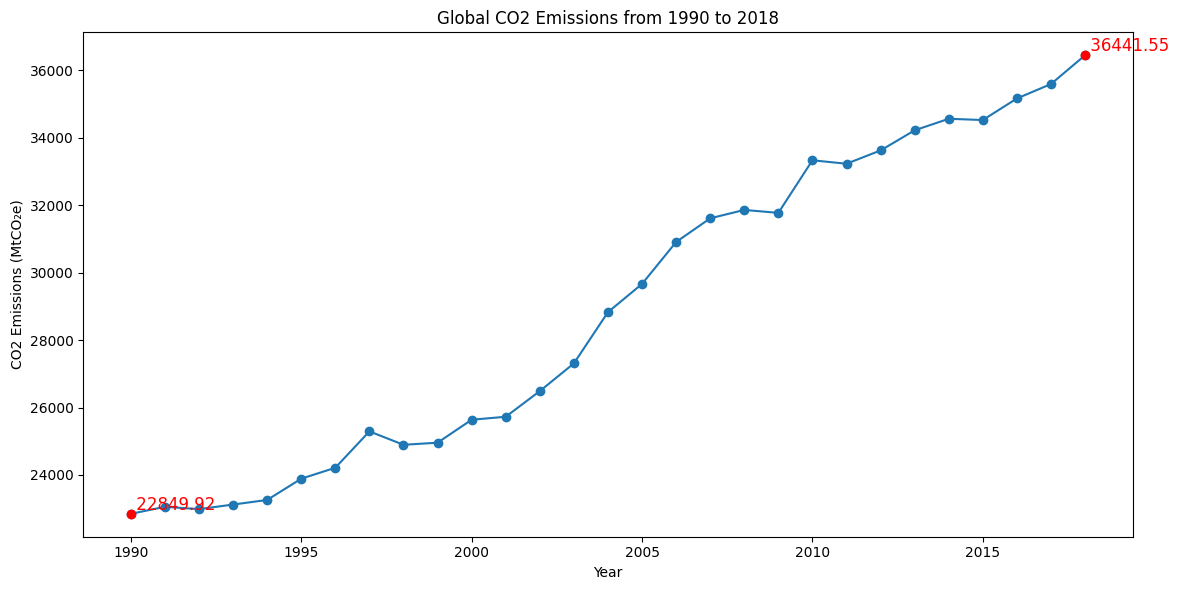

In [22]:
global_co2 = co2_data[co2_data['Country'] == 'World']
global_co2_summary = global_co2.drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit']).T
global_co2_summary.columns = ['Global CO2 Emissions (MtCO₂e)']
global_co2_summary.index.name = 'Year'
years = global_co2_summary.index.astype(int)
emissions = global_co2_summary['Global CO2 Emissions (MtCO₂e)']

# Extracting the Y values for 1990 and 2018
emission_1990 = global_co2_summary.loc['1990', 'Global CO2 Emissions (MtCO₂e)']
emission_2018 = global_co2_summary.loc['2018', 'Global CO2 Emissions (MtCO₂e)']

plt.figure(figsize=(12, 6))
plt.plot(years, emissions, marker='o')
# highlight the points for 1990 and 2018
plt.scatter([1990, 2018], [emission_1990, emission_2018], color='red', zorder=5)
plt.text(1990, emission_1990, f' {emission_1990} ', fontsize=12, color='red', verticalalignment='bottom')
plt.text(2018, emission_2018, f' {emission_2018} ', fontsize=12, color='red', verticalalignment='bottom')

# Adding title and labels
plt.title('Global CO2 Emissions from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.grid(False)
plt.tight_layout()
plt.show()

This is a line graph showing CO2 emissions worldwide from 1990 to 2018. The x-axis indicates the years, and the y-axis shows the CO2 emissions in metric tons.

Key takeaways:

- The graph shows a rapid upward trend in global emissions over the 28-year period.
- CO2 emissions in 1990 were 22,849 metric tons, and by 2018 they had increased to 36,441 metric tons. The emission levels nearly doubled in 28 years.

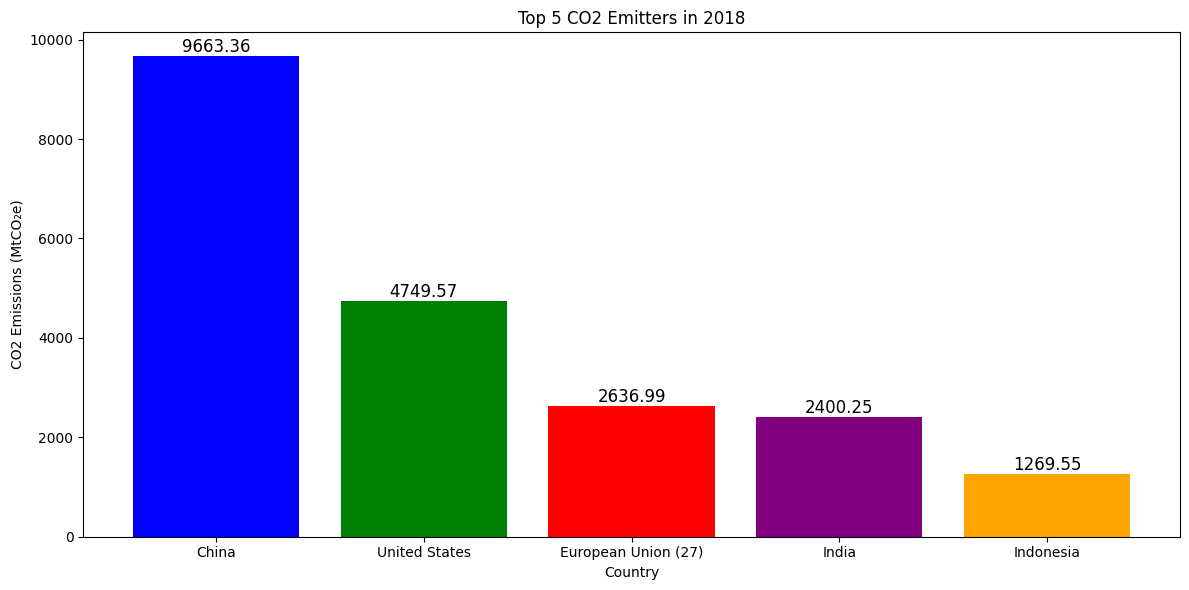

In [24]:
# graph a bar chart
top_emitters_2018 = co2_data.sort_values(by='2018', ascending=False)[1:6]

# Colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(12, 6))
bars = plt.bar(top_emitters_2018['Country'], top_emitters_2018['2018'], color=colors)

# Label each bar with its respective value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             verticalalignment='bottom', horizontalalignment='center', fontsize=12)

# Adding title and labels
plt.title('Top 5 CO2 Emitters in 2018')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (MtCO₂e)')

plt.tight_layout()

# Save the colorful bar plot
plt.savefig('top_emitters_2018_colorful_bar_plot.png')

# Show the plot
plt.show()

This is a bar chart showing the top 5 CO2-emitting countries. The x-axis indicates the country names, and the y-axis shows the CO2 emission levels.

We can see that the largest emitter, China, had twice as much CO2 emissions as the United States, which is the second-largest emitter.

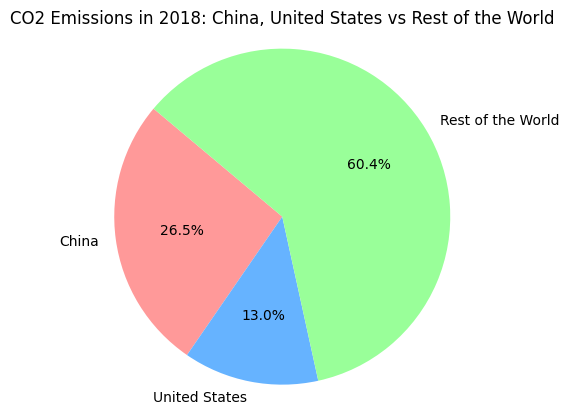

In [35]:
# Filter data for China, United States, and the World for the year 2018
china_co2_2018 = co2_data[co2_data['Country'] == 'China']['2018'].values[0]
us_co2_2018 = co2_data[co2_data['Country'] == 'United States']['2018'].values[0]
world_co2_2018 = co2_data[co2_data['Country'] == 'World']['2018'].values[0]
rest_of_world_co2_2018 = world_co2_2018 - (china_co2_2018 + us_co2_2018)

# Data for the pie chart
emissions_data = {
    'China': china_co2_2018,
    'United States': us_co2_2018,
    'Rest of the World': rest_of_world_co2_2018
}

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig, ax = plt.subplots()
ax.pie(emissions_data.values(), labels=emissions_data.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
ax.axis('equal')

plt.title('CO2 Emissions in 2018: China, United States vs Rest of the World')
plt.show()

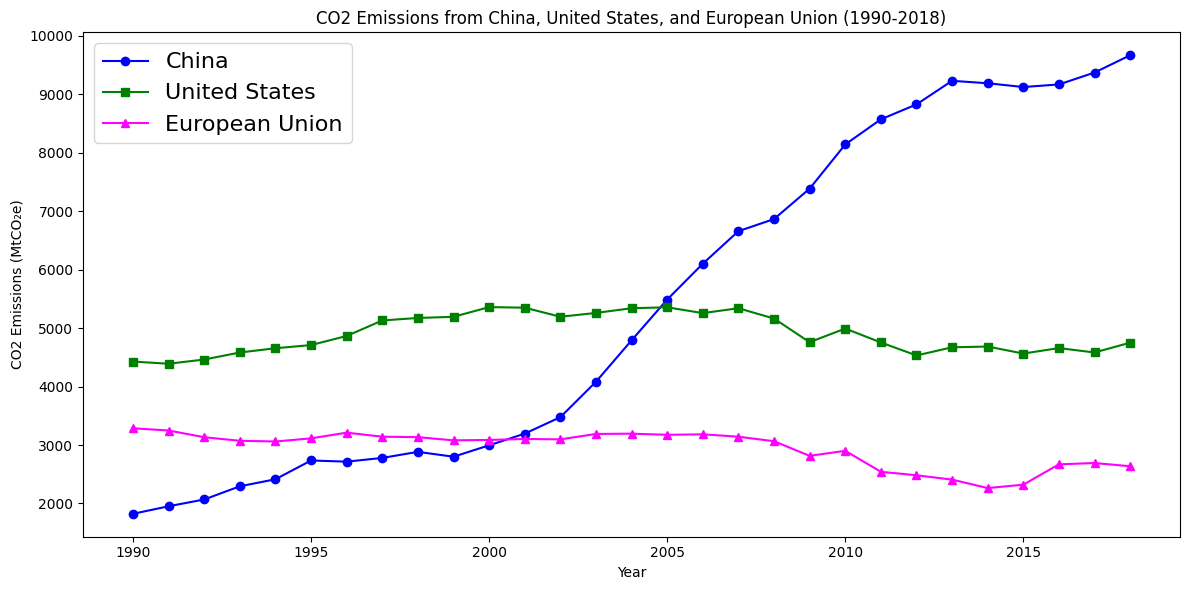

In [37]:
# Filter data for China, United States, and European Union
china_co2 = co2_data[co2_data['Country'] == 'China'].drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit']).T
china_co2.columns = ['China CO2 Emissions (MtCO₂e)']

us_co2 = co2_data[co2_data['Country'] == 'United States'].drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit']).T
us_co2.columns = ['United States CO2 Emissions (MtCO₂e)']

eu_co2 = co2_data[co2_data['Country'] == 'European Union (27)'].drop(columns=['Country', 'Data source', 'Sector', 'Gas', 'Unit']).T
eu_co2.columns = ['European Union CO2 Emissions (MtCO₂e)']

# Merge the data into a single dataframe
combined_co2_summary = pd.concat([china_co2, us_co2, eu_co2], axis=1)
combined_co2_summary.index = combined_co2_summary.index.astype(int)

plt.figure(figsize=(12, 6))
plt.plot(combined_co2_summary.index, combined_co2_summary['China CO2 Emissions (MtCO₂e)'], marker='o', color='blue', label='China')
plt.plot(combined_co2_summary.index, combined_co2_summary['United States CO2 Emissions (MtCO₂e)'], marker='s', color='green', label='United States')
plt.plot(combined_co2_summary.index, combined_co2_summary['European Union CO2 Emissions (MtCO₂e)'], marker='^', color='magenta', label='European Union')

plt.title('CO2 Emissions from China, United States, and European Union (1990-2018)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.legend(prop={'size': 16})
plt.tight_layout()
plt.show()

### Key Takeaways:

- Increasing trend of CO2 emissions worldwide

- China had the highest CO2 emissions follow by United States, European Union, and India

- China had a rapid increase of CO2 emissions due to rapid industrialization

- The United States and the European Union have maintained stable emissions levels, with a minor decrease due to evolving awareness and environmental policies

- Important for large countries to develop policies to reduce CO2 emissions
